# Previsão de fraude em cartões de crédito

---

## Sobre


Olá! Este é um notebook Jupyter sobre Detecção de Fraude de Cartão de Crédito. O objetivo deste projeto é desenvolver um modelo de aprendizado de máquina que possa detectar transações fraudulentas em dados de cartão de crédito.

A detecção de fraude é um problema importante e crescente para as instituições financeiras e para os usuários de cartão de crédito. Além disso, é um desafio técnico interessante, pois envolve a análise de dados complexos e a identificação de padrões anômalos.

Neste notebook, vamos cobrir os seguintes passos:

- Coleta e preparação de dados: Vamos obter e limpar o conjunto de dados de transações de cartão de crédito.

- Análise exploratória de dados (EDA): Vamos explorar os dados para identificar padrões e relações importantes que possam ser usados para detectar fraude.

- Treinamento e avaliação de modelos: Vamos treinar vários modelos de aprendizado de máquina e avaliar sua precisão na previsão de fraude.

- Otimização de modelos: Vamos otimizar os modelos para aumentar a precisão.

Espero que este notebook forneça uma visão geral do processo de detecção de fraude de cartão de crédito e que possa ser útil para aqueles interessados em aprender sobre o assunto. Vamos começar!


## Base de dados

### Disponível em [kaggle](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud)

## Ferramentas

  <img style='display:inline' src="https://img.shields.io/badge/Python-3.9.13-informational?style=for-the-badge&logo=python">
  
  <img style='display:inline' src="https://img.shields.io/badge/Jupyter-7.31.1-informational?style=for-the-badge&logo=jupyter">
  
  <img style='display:inline' src="https://img.shields.io/badge/Anaconda-22.9.0-informational?style=for-the-badge&logo=anaconda">

  <img style='display:inline' src="https://img.shields.io/badge/ubuntu-22.04.1-informational?style=for-the-badge&logo=ubuntu">
  
---

> Feito por: Joel Carneiro


## 1.0 Coleta e preparação de dados

In [8]:
# Importação da biblioteca Pandas
import pandas as pd

# Importação da biblioteca Numpy
import numpy as np

# Importação da biblioteca Matplotlib
import matplotlib.pyplot as plt

# Importação da biblioteca Seaborn
import seaborn as sns

In [9]:
pwd = '/home/joel/Documentos/data/card_transdata.csv'

raw_data = pd.read_csv(pwd)

In [10]:
raw_data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


## 2.0 Preparação de dados

In [12]:
raw_data.shape

(1000000, 8)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [17]:
if raw_data.isna().sum().sum() == 0:
    print('Não há dados nulos')

Não há dados nulos


In [26]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


## 3.0 Análise exploratória de dados (EDA)

In [18]:
df = raw_data

In [19]:
df.mean()

distance_from_home                26.628792
distance_from_last_transaction     5.036519
ratio_to_median_purchase_price     1.824182
repeat_retailer                    0.881536
used_chip                          0.350399
used_pin_number                    0.100608
online_order                       0.650552
fraud                              0.087403
dtype: float64

In [20]:
df.median()

distance_from_home                9.967760
distance_from_last_transaction    0.998650
ratio_to_median_purchase_price    0.997717
repeat_retailer                   1.000000
used_chip                         0.000000
used_pin_number                   0.000000
online_order                      1.000000
fraud                             0.000000
dtype: float64

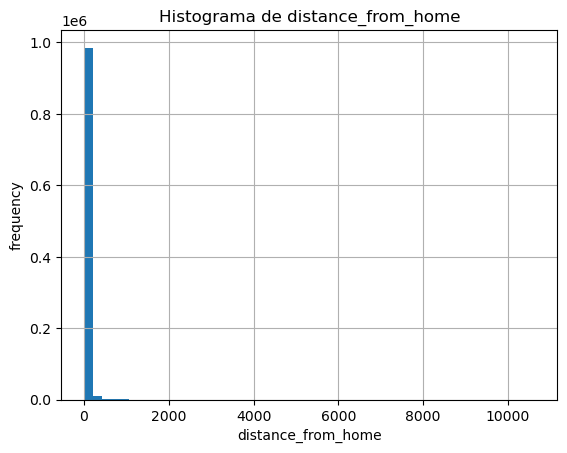

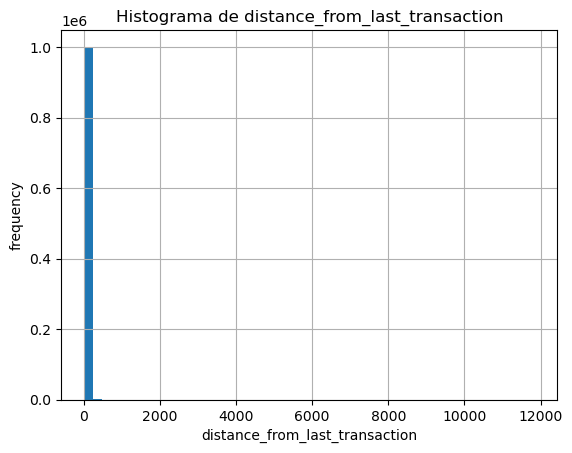

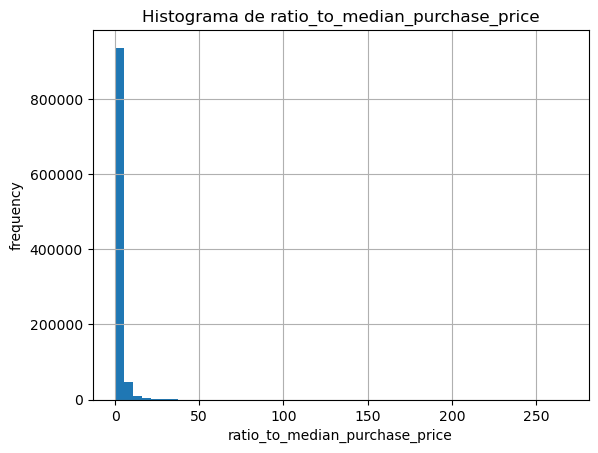

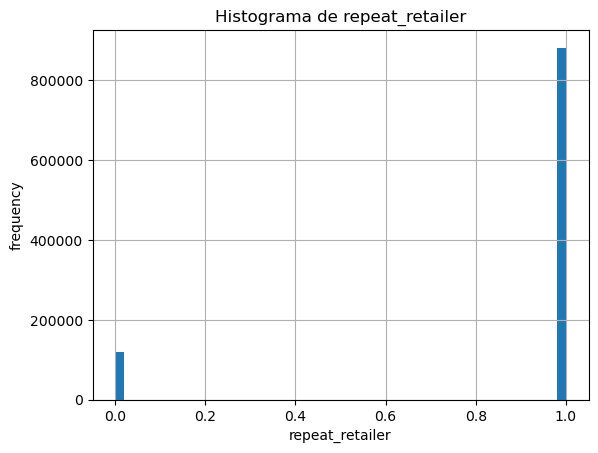

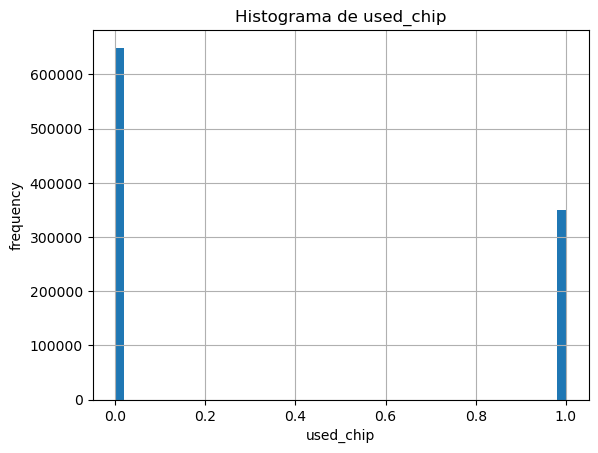

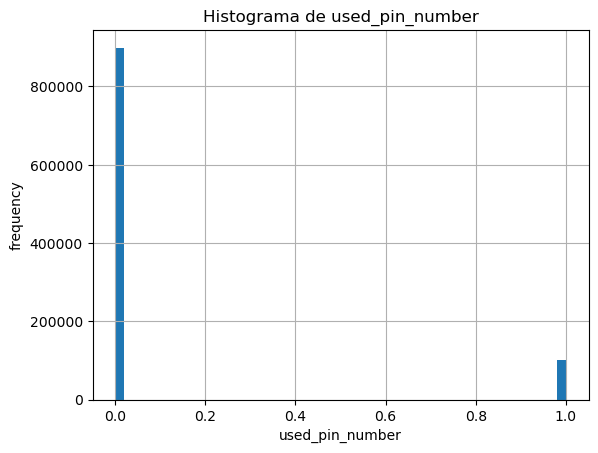

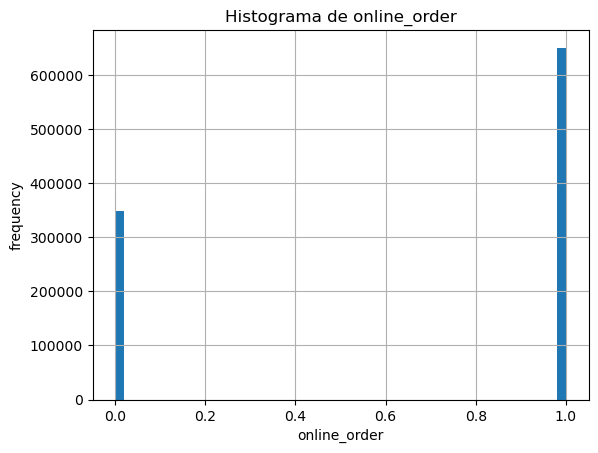

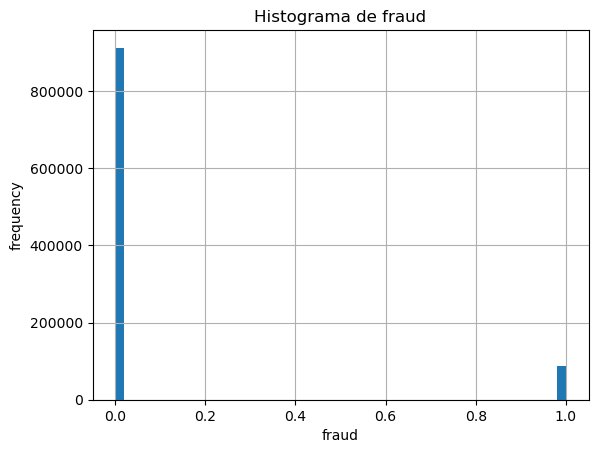

In [32]:
for variable in df.columns:
    df[variable].hist(bins=50)
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('frequency')
    plt.show()

<AxesSubplot:>

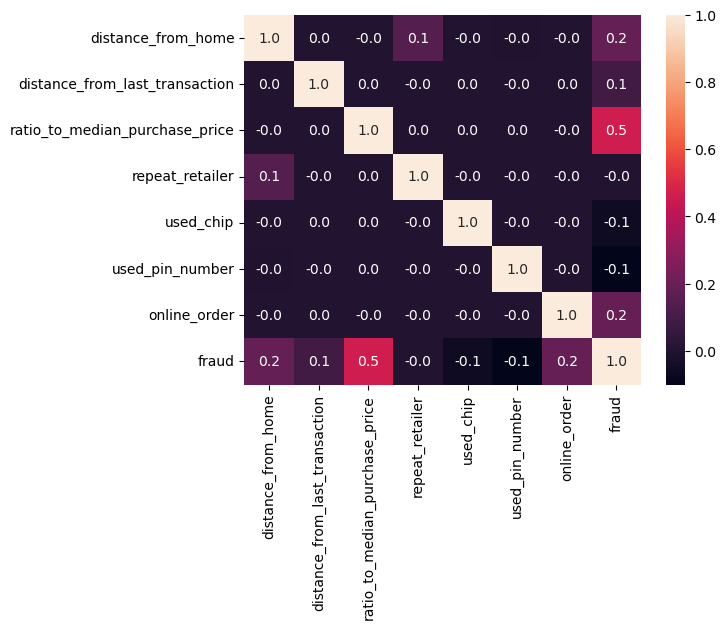

In [34]:
sns.heatmap(df.corr(), fmt='.1f', annot=True)

In [46]:
categorys = df['fraud'].value_counts()

print('A proporção de fraudes da base de dados é: %.2f%%' % (categorys[1] / (categorys[0] + categorys[1]) * 100))

A proporção de fraudes da base de dados é: 8.74%


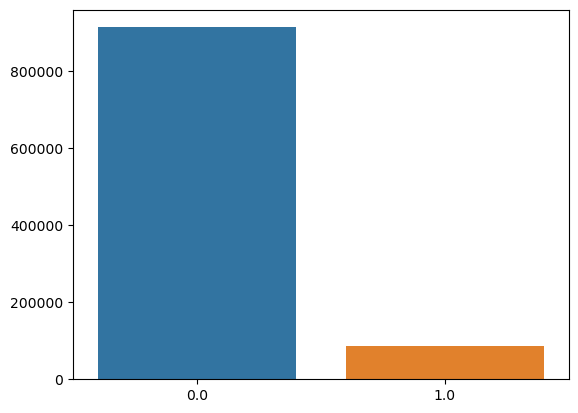

In [54]:
sns.barplot(x = categorys.index, y = categorys.values);

## 4.0 Implementação do modelo

### 4.1 Separando dados de treino e teste

In [64]:
from sklearn.model_selection import train_test_split

x = df.drop(['fraud'], axis=1)
y = df['fraud']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=44, test_size=0.25,stratify=y)

### 4.2 Teste inicial

In [78]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()

dummy.fit(x_train, y_train)

dummy.score(x_test, y_test)

0.912596

In [79]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=2)

dtc.fit(x_train, y_train)

dtc.score(x_test, y_test)

0.966288

In [74]:
x.columns[dtc.feature_importances_ > 0]

Index(['distance_from_home', 'ratio_to_median_purchase_price', 'online_order'], dtype='object')

## 5.0 Avaliando métricas

In [80]:
from sklearn import metrics

In [88]:
y_pred = dtc.predict(x_test)

In [93]:
confunsion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [90]:
metrics.precision_score(y_test, y_pred)

0.9049659084052374

<AxesSubplot:>

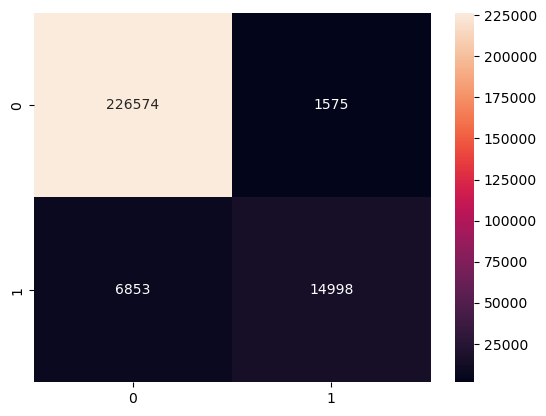

In [97]:
sns.heatmap(confunsion_matrix, annot=True, fmt='d')

acertou 14998 e errou 1575

## 6.0 Trabalhando com dados balanceados

In [103]:
print('O modelo tem %.2f%% de confiança' % (14998 / (14998 + 1575) * 100))

O modelo tem 90.50% de confiança


In [108]:
fraud_zero = df.query('fraud == 0').sample(87403)

In [109]:
fraud_one = df.query('fraud == 1')

In [112]:
df = pd.concat([fraud_zero, fraud_one])

In [123]:
from sklearn.model_selection import train_test_split

x = df[['distance_from_home', 'ratio_to_median_purchase_price', 'online_order']]
y = df['fraud']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=44, test_size=0.25,stratify=y)

In [124]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()

dummy.fit(x_train, y_train)

dummy.score(x_test, y_test)

0.5

In [125]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=2)

dtc.fit(x_train, y_train)

dtc.score(x_test, y_test)

0.9351974737998261

In [126]:
from sklearn import metrics

In [127]:
y_pred = dtc.predict(x_test)

In [128]:
confunsion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [129]:
metrics.precision_score(y_test, y_pred)

0.9292259083728278

<AxesSubplot:>

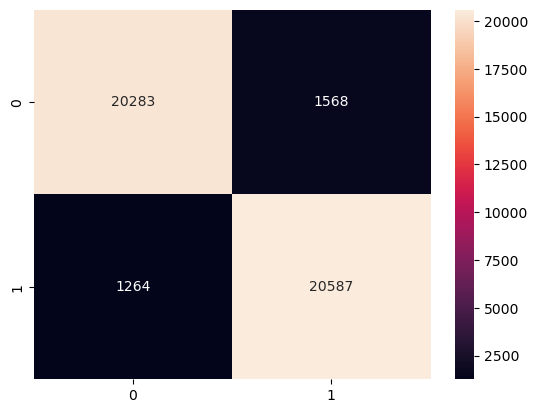

In [130]:
sns.heatmap(confunsion_matrix, annot=True, fmt='d')